# バブルソート

- バブルソート
- シェーカーソート（バブルソート改良版）

In [68]:
# display graph on notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import time
import random
from my_modules import least_square

In [69]:
# バブルソート
def bubble_sort(array):
    N = len(array)
    for i in range(N-1):
        for j in range(N-1-i):
            if array[j] > array[j+1]:
                buff = array[j]
                array[j] = array[j+1]
                array[j+1] = buff

In [15]:
arr = np.array([random.randint(0, 100) for i in range(30)])
bubble_sort(arr)
arr

array([  1,   5,   9,  12,  16,  18,  18,  18,  23,  27,  31,  41,  41,
        42,  43,  45,  59,  61,  65,  67,  73,  73,  76,  78,  86,  87,
        93,  95,  99, 100])

In [74]:
n_list = []
t_list = []
for n in [1000*i for i in range(1, 10+1)]:
    arr = np.array([random.random() for i in range(n)])
    start = time.time()
    bubble_sort(arr)
    end = time.time()
    n_list.append(n)
    t_list.append(round(end-start, 6))

pd.DataFrame(data=np.array([n_list, t_list]).T, columns=['array length', 'sort time [s]'])

,array length,sort time [s]
0,1000.0,0.522767
1,2000.0,2.373238
2,3000.0,4.533350
3,4000.0,7.864802
4,5000.0,12.139246
5,6000.0,17.663267
6,7000.0,23.666970
7,8000.0,30.937931
8,9000.0,39.214649
9,10000.0,48.555346


,a
0,2.732562e-01
1,-4.480077e-05
2,4.862417e-07


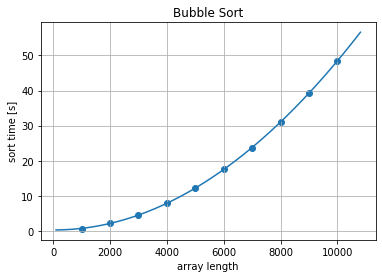

In [75]:
plt.grid()
plt.title('Bubble Sort')
plt.xlabel('array length')
plt.ylabel('sort time [s]')
a = least_square.least_square(np.array([n_list, t_list]).T, 2, True)
pd.DataFrame(data=a, columns=['a'])

In [76]:
# シェーカーソート
def shaker_sort(array):
    N = len(array)
    i_left = 0
    i_right = N-1
    
    while True:
        cnt_switch = 0
        i = i_left
        i_last_switch = i_left
        while i < i_right:
            if array[i] > array[i+1]:
                buff = array[i]
                array[i] = array[i+1]
                array[i+1] = buff
                i_last_switch = i
                cnt_switch += 1
            i += 1
        i_right = i_last_switch
        if cnt_switch == 0:
            break
    
        cnt_switch = 0
        i = i_right
        i_last_switch = i_right
        while i_left < i:
            if array[i-1] > array[i]:
                buff = array[i]
                array[i] = array[i-1]
                array[i-1] = buff
                i_last_switch = i
                cnt_switch += 1
            i -= 1
        i_left = i_last_switch
        if cnt_switch == 0:
            break

In [77]:
arr = np.array([random.randint(0, 100) for i in range(30)])
shaker_sort(arr)
arr

array([ 0,  3,  4,  6,  9, 12, 14, 17, 17, 25, 37, 40, 42, 44, 48, 48, 51,
       55, 57, 58, 59, 59, 65, 66, 72, 74, 75, 82, 84, 87])

In [78]:
n_list = []
t_list = []
for n in [1000*i for i in range(1, 10+1)]:
    arr = np.array([random.random() for i in range(n)])
    start = time.time()
    shaker_sort(arr)
    end = time.time()
    n_list.append(n)
    t_list.append(round(end-start, 6))

pd.DataFrame(data=np.array([n_list, t_list]).T, columns=['array length', 'sort time [s]'])

,array length,sort time [s]
0,1000.0,0.483371
1,2000.0,2.029522
2,3000.0,4.974599
3,4000.0,7.293238
4,5000.0,11.247360
5,6000.0,16.066987
6,7000.0,21.447427
7,8000.0,29.285295
8,9000.0,36.375201
9,10000.0,44.359311


,a
0,2.287899e-01
1,3.497480e-05
2,4.398722e-07


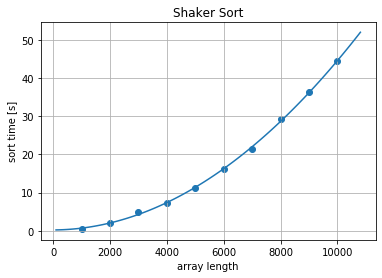

In [80]:
plt.grid()
plt.title('Shaker Sort')
plt.xlabel('array length')
plt.ylabel('sort time [s]')
a = least_square.least_square(np.array([n_list, t_list]).T, 2, True)
pd.DataFrame(data=a, columns=['a'])